In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from ipynb.fs.full.functions import i_star, i_c, i_s, properties, rotor_inlet, delta_star, lc_star, lc_OD, compressor_solver
from ipynb.fs.full.functions import delta_OD, rotor_outlet, stator_outlet, efficiency, checker, stage_solver, stage_solver_star

# Data

## Stage1

In [2]:
alpha1 = 20                #degree
N_design = 5000            #RPM
N_stage  = 3
P01 = 101.325/101.325      #bar
T01 = 288.17               #k

#P01 = 35.6/101.325      #bar
#T01 = 236.17               #k

t_max_c = 0.12             #t_max/c

r_h1 = 0.1131              #meter
r_t1 = 0.2262              #meter
H1 = r_t1-r_h1

r_h2 = 0.1171              #meter
r_t2 = 0.2223              #meter
H2 = r_t2-r_h2

r_h3 = 0.1210              #meter
r_t3 = 0.2184              #meter
H3 = r_t3-r_h3

r_m1 = (r_h1+r_t1)/2
r_m2 = (r_h2+r_t2)/2
r_m3 = (r_h3+r_t3)/2

#for compressor:
C_p = 1.004                #kJ/kg-k
gama = 1.4  
R = 0.287                  #kJ/kg-k

### Rotor

In [3]:
beta_prime1 = 60.64       #degree
beta_prime2 = 46          #degree
#beta_prime1 = 50          #degree
#beta_prime2 = 30          #degree#
sigma_r = 1/1.35          #rotor solidity at r_m
c_r = 0.0375              #rotor chord[meter
s_r = c_r/sigma_r

### Stator

In [4]:
alpha_prime2 = 27.14      #degree
#alpha_prime3 = 0.08       #degree
alpha_prime3 = 7       #degree
#alpha_prime2 = 57.6       #degree
#alpha_prime3 = 32.6       #degree
sigma_s = 1/2.59          #stator solidity at r_m
c_s = 0.0343              #stator chord[meter]
s_s = c_s/sigma_s

In [5]:
blade_type = ['C_Series','circular']
a_c = 0.5

## Operating Range

In [6]:
stage1_data = (alpha1, P01, T01, beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, alpha_prime2,
               alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, r_h1, r_h2, r_t1, r_t2, s_s, s_r)

In [7]:
i_star_r, delta_star_r, beta2_star_r, i_star_s, delta_star_s, beta2_star_s, M_W1_star, M_C2_star, i_s_r, i_c_r, i_s_s, i_c_s, loss_coefficient_star_r, loss_coefficient_star_s = stage_solver_star(
    alpha1, N_design, P01, T01, beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, 
    alpha_prime2, alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, gama, R, r_h1, r_h2, r_t1, r_t2, s_s, s_r, N_stage
)

In [8]:
i_or = np.linspace(i_c_r, i_s_r, 25)

In [9]:
N_or = N_design*np.array([0.5, 0.7, 0.8, 0.9, 1])

In [10]:
etta_or = np.zeros((len(N_or), len(i_or)))

In [11]:
P02_P01_or = np.zeros((len(N_or), len(i_or)))

In [12]:
m_dot_or =  np.zeros((len(N_or), len(i_or)))

## Stage2

In [13]:
t_max_c = 0.12             #t_max/c

r_h1 = 0.1210              #meter
r_t1 = 0.2184              #meter
H1 = r_t1-r_h1

r_h2 = 0.1244              #meter
r_t2 = 0.2149              #meter
H2 = r_t2-r_h2

r_h3 = 0.1279              #meter
r_t3 = 0.2115              #meter
H3 = r_t3-r_h3

r_m1 = (r_h1+r_t1)/2
r_m2 = (r_h2+r_t2)/2
r_m3 = (r_h3+r_t3)/2

### Rotor

In [14]:
beta_prime1 = 57.70       #degree
beta_prime2 = 35.79       #degree
#beta_prime1 = 50       #degree
#beta_prime2 = 30       #degree
sigma_r = 1/0.863         #rotor solidity at r_m
c_r = 0.0316              #rotor chord[meter]
s_r = c_r/sigma_r

### Stator

In [15]:
alpha_prime2 = 41.05      #degree
alpha_prime3 = 18.26      #degree
#alpha_prime2 = 57.6       #degree
#alpha_prime3 = 32.6      #degree
sigma_s = 1/2.51          #stator solidity at r_m
c_s = 0.0303              #stator chord[meter]
s_s = c_s/sigma_s

In [16]:
stage2_data = (beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, alpha_prime2,
               alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, r_h1, r_h2, r_t1, r_t2, s_s, s_r)

## Stage3

In [17]:
t_max_c = 0.12             #t_max/c

r_h1 = 0.1279              #meter
r_t1 = 0.2115              #meter
H1 = r_t1-r_h1

r_h2 = 0.1310              #meter
r_t2 = 0.2084              #meter
H2 = r_t2-r_h2

r_h3 = 0.1341              #meter
r_t3 = 0.2053              #meter
H3 = r_t3-r_h3

r_m1 = (r_h1+r_t1)/2
r_m2 = (r_h2+r_t2)/2
r_m3 = (r_h3+r_t3)/2

### Rotor

In [18]:
beta_prime1 = 50.92       #degree
beta_prime2 = 20.67       #degree
#beta_prime1 = 50       #degree
#beta_prime2 = 30       #degree
sigma_r = 1/0.840         #rotor solidity at r_m
c_r = 0.0282              #rotor chord[meter]
s_r = c_r/sigma_r

### Stator

In [19]:
alpha_prime2 = 50.92      #degree
alpha_prime3 = 19.76      #degree
#alpha_prime2 = 57.6         #degree
#alpha_prime3 = 32.6         #degree
sigma_s = 1/0.796         #stator solidity at r_m
c_s = 0.0257              #stator chord[meter]
s_s = c_s/sigma_s

In [20]:
stage3_data = (beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, alpha_prime2,
               alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, r_h1, r_h2, r_t1, r_t2, s_s, s_r)

In [21]:
compressor_data = [stage1_data, stage2_data, stage3_data]

# Operating Curves

In [22]:
m, n = 0, 0

In [23]:
for N in N_or:
    print(N)
    print(N)
    print(N)
    
    for i in i_or:
        
        print(f'for N = {N} and i = {i}, We have:')
        P02_P01_or[m][n], etta_or[m][n], m_dot_or[m][n], flag = compressor_solver(compressor_data, gama, i, N, R, N_design, N_stage)
                
        if flag == 0:
            P02_P01_or[m][n], etta_or[m][n], m_dot_or[m][n] = 0, 0, 0
            
        n = n+1
    print('END')
    print('END')
    print('END')
    m = m+1
    n = 0

2500.0
2500.0
2500.0
for N = 2500.0 and i = -9.324896255881237, We have:
in stage 1, h is not True
in stage 1, h0 is not True
in stage 1, P is not True
for N = 2500.0 and i = -8.621288892177882, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -7.9176815284745246, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -7.214074164771169, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -6.510466801067812, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -5.806859437364457, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -5.103252073661101, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 2500.0 and i = -4.3996447099577445, We have:
in stage 1, P is not True
for N = 2500.0 and i = -3.6960373462543883, We have:
everything in stage 1 is alright
in stage 2, h is not True
in stage 2, P is not True
for N 

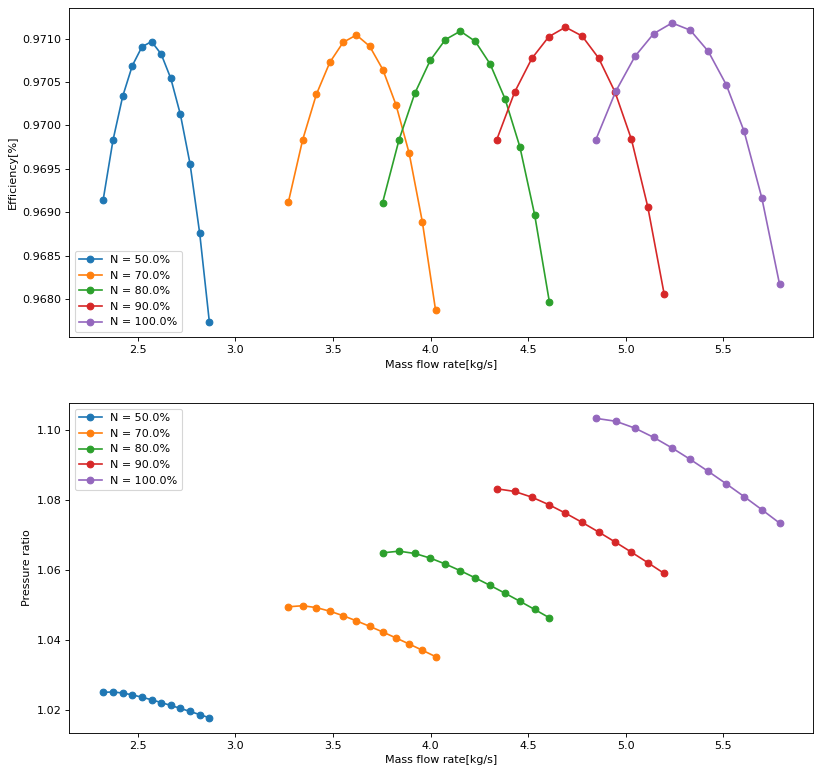

In [24]:
figure(figsize=(12, 12), dpi=80)
plt.subplot(2, 1, 1)

for i in range(0, len(N_or)):
    
    m_dot_corrected = np.array([m for m in m_dot_or[i] if m!=0])
    etta_corrected = np.array([m for m in etta_or[i] if m!=0])
    
    plt.plot(m_dot_corrected, etta_corrected, marker = "o", linestyle = "solid", label=f'N = {N_or[i]/N_design*100}%')
    plt.xlabel('Mass flow rate[kg/s]')
    plt.ylabel('Efficiency[%]')
    plt.legend()
    
    
plt.subplot(2, 1, 2)


for i in range(0, len(N_or)):
    
    m_dot_corrected = np.array([m for m in m_dot_or[i] if m!=0])
    P02_P01_corrected = np.array([m for m in P02_P01_or[i] if m!=0])
    
    plt.plot(m_dot_corrected, P02_P01_corrected, marker = "o", linestyle = "solid", label=f'N = {N_or[i]/N_design*100}%')
    plt.xlabel('Mass flow rate[kg/s]')
    plt.ylabel('Pressure ratio')
    plt.legend()
    